In [1]:
import numpy as np 
import pandas as pd
import wget

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [3]:
!wget $data -O data.csv

--2022-10-03 16:58:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... .......... 69%  499K 0s
    50K .......... .......... .                               100% 23.1M=0.1s

2022-10-03 16:58:45 (708 KB/s) - 'data.csv' saved [73250/73250]



In [4]:
df = pd.read_csv('data.csv')

## DATA EXPLORATION

In [5]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


### The 'card' column is the target column. 

In [7]:
df.card = (df.card == 'yes').astype(int)

In [8]:
df.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.50,0.004156,15.000000,yes,no,4,58,1,5


In [9]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

categorical = ['owner', 'selfemp']

In [10]:
df.describe()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


### For the purpose of plots, I will make a copy of this dataframe. Also, I will make some numerical columns as categorical.

In [11]:
df_copy = df.copy()

In [12]:
df_copy.nunique()

card              2
reports          13
age             418
income          431
share          1162
expenditure     981
owner             2
selfemp           2
dependents        7
months          193
majorcards        2
active           35
dtype: int64

In [13]:
numerical_copy = ['age', 'income', 'share', 'expenditure', 'active', 'months']

categorical_copy = ['reports', 'dependents', 'owner', 'majorcards', 'selfemp']

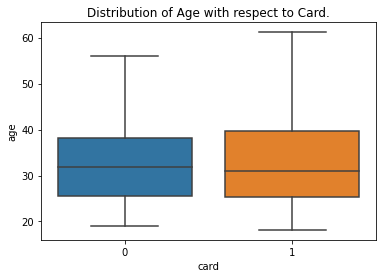

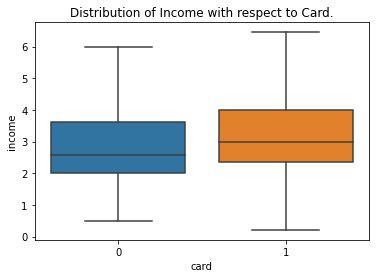

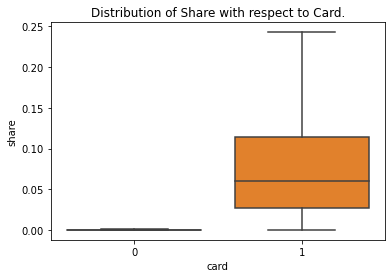

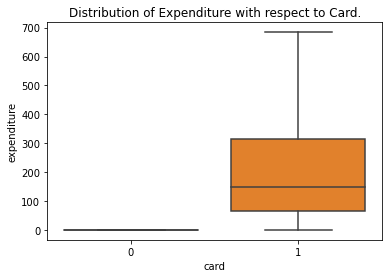

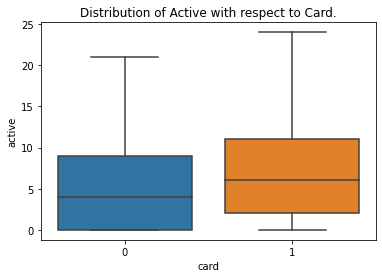

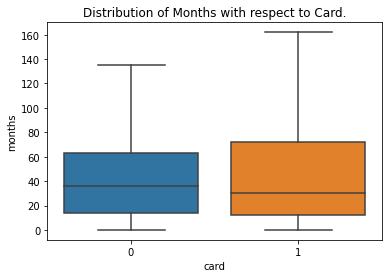

In [14]:
for c in numerical_copy:
    plt.figure()
    
    sns.boxplot(data = df_copy, x= 'card', y = c, showfliers = False)
    plt.title(f'Distribution of {c.title()} with respect to Card.');

In [15]:
df_copy[df_copy.card == 0].expenditure.value_counts()

0.0    296
Name: expenditure, dtype: int64

In [16]:
zero_expenditure_value_0 = df_copy[df_copy.card == 0].expenditure.value_counts().values[0]

In [17]:
df_copy[df_copy.card == 1].expenditure.value_counts()

0.000000      21
4.583333       9
8.333333       8
7.083333       5
37.583330      2
              ..
242.128300     1
58.990830      1
174.925000     1
415.805800     1
83.083340      1
Name: expenditure, Length: 981, dtype: int64

In [18]:
zero_expenditure_value_1 = df_copy[df_copy.card == 1].expenditure.value_counts().values[0]

In [19]:
total_zero_expenditure = zero_expenditure_value_0 + zero_expenditure_value_1

#### Probability of the card being 0 when the expenditure is 0.

In [20]:
prob = zero_expenditure_value_0/total_zero_expenditure
prob

0.9337539432176656

#### The probablity that the outcome of the target column-card will be 0 once the expenditure is 0 is very very high, as seen above. Hence, the barplot showing the relationship between expenditure and card.

In [21]:
df_copy[df_copy.card == 0].share.min(), df_copy[df_copy.card == 0].share.mean(), df_copy[df_copy.card == 0].share.max()

(0.0001090909, 0.0004767954841216088, 0.00244898)

In [22]:
df_copy[df_copy.card == 1].share.min(), df_copy[df_copy.card == 1].share.mean(), df_copy[df_copy.card == 1].share.max()

(0.0001859543, 0.08848152972453567, 0.9063205)

#### As seen above, the distribution of the values in the share column is such that, the lower the share, the most likely the card will be 0. Hence, the plot showing the relationship between the card and the share.

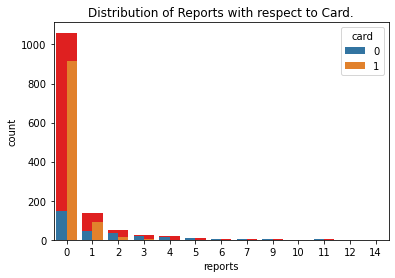

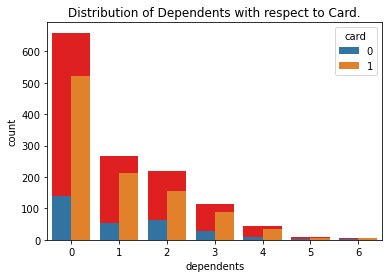

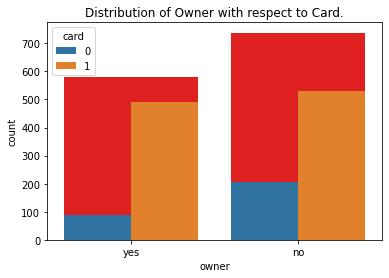

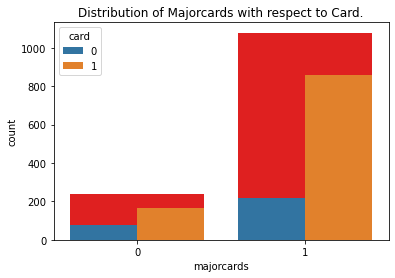

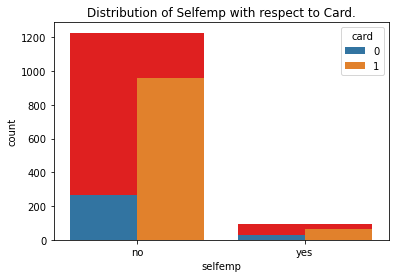

In [23]:
for c in categorical_copy:
    plt.figure()
    
    sns.countplot(data = df_copy, x= c , color = 'red')
    sns.countplot(data = df_copy, x= c , hue = 'card')
    plt.title(f'Distribution of {c.title()} with respect to Card.');

### TRAIN, TEST, and SPLIT

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [29]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

#### No missing data

In [30]:
df_full_train.card.value_counts(normalize=True)

1    0.781991
0    0.218009
Name: card, dtype: float64

In [31]:
df_full_train.card.mean()

0.7819905213270142

In [32]:
df_full_train[numerical].nunique()

reports         13
age            389
income         370
share          945
expenditure    791
dependents       7
months         177
majorcards       2
active          34
dtype: int64

### ROC AUC

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Question 1
- Which numerical variable (among the following 4) has the highest AUC?
> reports, dependents, active, share

In [34]:
options = ['reports', 'dependents', 'active', 'share']
for c in options:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s: %.3f' % (c, auc))

  reports: 0.717
dependents: 0.533
   active: 0.604
    share: 0.989


### Answer
- Highest AUC: share - 0.989

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [36]:
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [37]:
train_dict = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

### Question 2
- What's the AUC of this model on the validation dataset? (round to 3 digits)

In [38]:
y_pred = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.995171242063847

### Answer
- The AUC score of the model is 0.995

### Question 3
> Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01

> For each threshold, compute precision and recall. Plot them

- At which threshold precision and recall curves intersect?

In [39]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [40]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [41]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [42]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


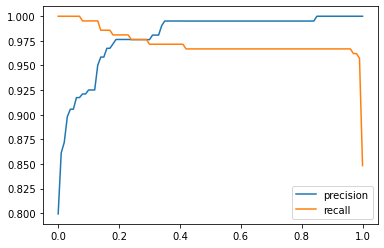

In [43]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.legend();

### Answer
- The precision and the recall values intercept somewhere around threshold = 0.3

## Question 4
> Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

- At which threshold F1 is maximal?

In [44]:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

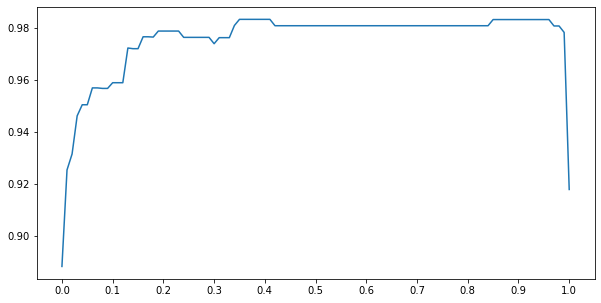

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(df_scores.threshold, df_scores.f1)

plt.xticks(np.linspace(0, 1, 11));

In [46]:
max_f1 = max(df_scores['f1'])

In [47]:
df_scores[df_scores['f1'] == max_f1][['threshold', 'f1']]

,threshold,f1
35,0.35,0.983213
36,0.36,0.983213
37,0.37,0.983213
38,0.38,0.983213
39,0.39,0.983213
40,0.40,0.983213
41,0.41,0.983213


### Answer
- f1 is maximal when the threshold is approx 0.4

## Question 5
> Use AUC to evaluate the model on validation
- How large is standard devidation of the AUC scores across different folds?

In [48]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [49]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [50]:
auc_scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

print('%.3f +- %.3f' % (np.mean(auc_scores), np.std(auc_scores)))

0it [00:00, ?it/s]

0.996 +- 0.003


### Answer
- The standard deviation of the AUC scores is 0.003

## Question 6
> Iterate over the following C values: [0.01, 0.1, 1, 10]

> Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
- Which C leads to the best mean score?

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

0it [00:00, ?it/s]

C=0.01, 0.992 +- 0.006


0it [00:00, ?it/s]

C= 0.1, 0.995 +- 0.004


0it [00:00, ?it/s]

C=   1, 0.996 +- 0.003


0it [00:00, ?it/s]

C=  10, 0.996 +- 0.003


#### If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

### Answer
- The C with the best mean score is 1 (as seen above).